In [3]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
import sklearn.metrics as metrics
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width', 'Class']

dataset = pd.read_csv("8-dataset.csv", names=names)

X = dataset.iloc[:, :-1]  

label = {'Iris-setosa': 0,'Iris-versicolor': 1, 'Iris-virginica': 2} 

y = [label[c] for c in dataset.iloc[:, -1]]

In [5]:
dataset

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
plt.figure(figsize=(14,7))
colormap=np.array(['red','lime','black'])

<Figure size 1008x504 with 0 Axes>

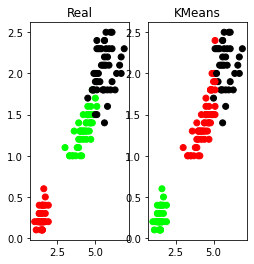

In [12]:
# REAL PLOT
plt.subplot(1,3,1)
plt.title('Real')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y])

# K-PLOT
model=KMeans(n_clusters=3, random_state=0).fit(X)
plt.subplot(1,3,2)
plt.title('KMeans')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[model.labels_])

In [9]:
print('The accuracy score of K-Mean: ',metrics.accuracy_score(y, model.labels_))
print('The Confusion matrixof K-Mean:\n',metrics.confusion_matrix(y, model.labels_))

The accuracy score of K-Mean:  0.24
The Confusion matrixof K-Mean:
 [[ 0 50  0]
 [48  0  2]
 [14  0 36]]


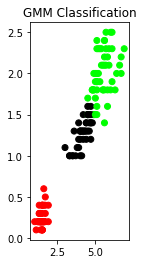

In [10]:
# GMM PLOT
gmm=GaussianMixture(n_components=3, random_state=0).fit(X)
y_cluster_gmm=gmm.predict(X)
plt.subplot(1,3,3)
plt.title('GMM Classification')
plt.scatter(X.Petal_Length,X.Petal_Width,c=colormap[y_cluster_gmm])

In [11]:
print('The accuracy score of EM: ',metrics.accuracy_score(y, y_cluster_gmm))
print('The Confusion matrix of EM:\n ',metrics.confusion_matrix(y, y_cluster_gmm))

The accuracy score of EM:  0.36666666666666664
The Confusion matrix of EM:
  [[50  0  0]
 [ 0  5 45]
 [ 0 50  0]]
